<a href="https://colab.research.google.com/github/suhedakarabudak/Machine-Learning/blob/master/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
cd /content/drive/MyDrive/BreastCancer/

/content/drive/MyDrive/BreastCancer


In [ ]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Load Libraries**

In [ ]:
%pip install optuna
import numpy as np
import pandas as pd
import optuna
import warnings
import plotly
import plotly.graph_objs as go
from plotly.offline import *
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix ,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_curve
#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
#clustring
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

df=pd.read_csv("data.csv")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 11.0 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ecbe60c089949786133f0c83edc1e79835a80781962fff4cca6dfedf2c53dc78
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  At

In [ ]:
df.info

In [ ]:
#Missing değerler var mı 
df.isnull().sum().sort_values(ascending=False)

Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

In [ ]:
# Sütun silme işlemi
df = df.drop(['Unnamed: 32','id'],axis = 1)

# Hedef değişkeni M: 1 (kötü huylu) B=0 (iyi huylu)
#df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


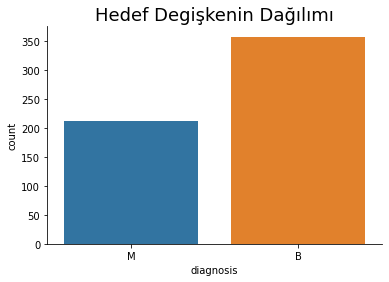

In [ ]:
sns.countplot(df['diagnosis'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Hedef Degişkenin Dağılımı', fontsize=18)
plt.show()

In [ ]:
#numerical_plotting fonksiyonu her bir sütunun normal dağılım olup olmadığını anlamak için boxplot grafiğini çizdirir.
def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

In [ ]:
#df.describe()[['radius_mean']].T

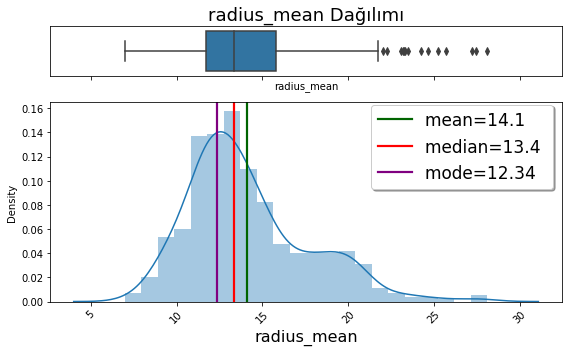

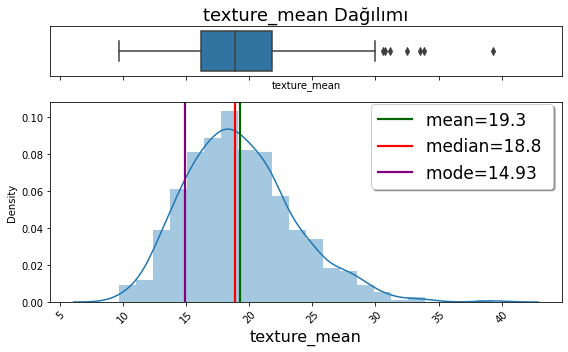

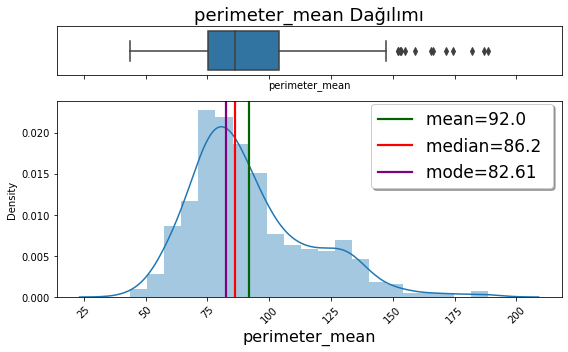

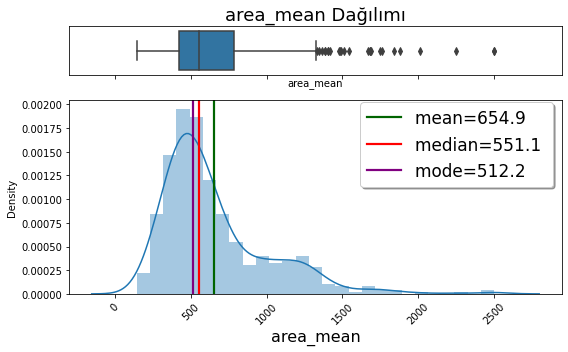

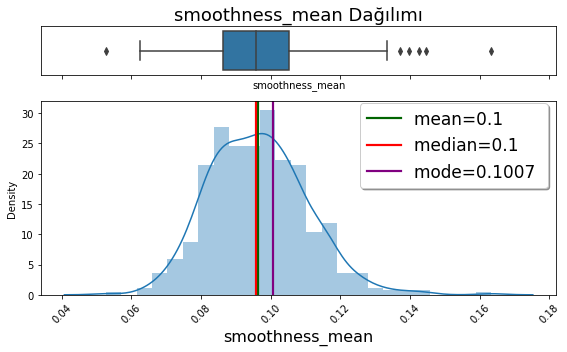

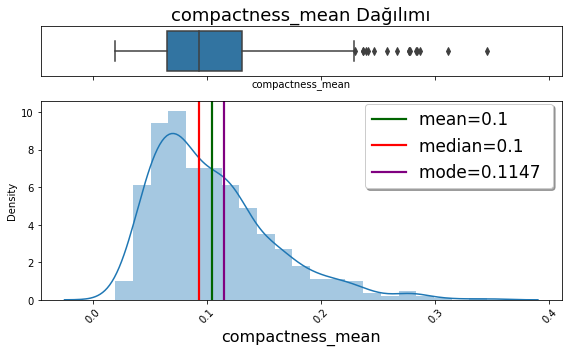

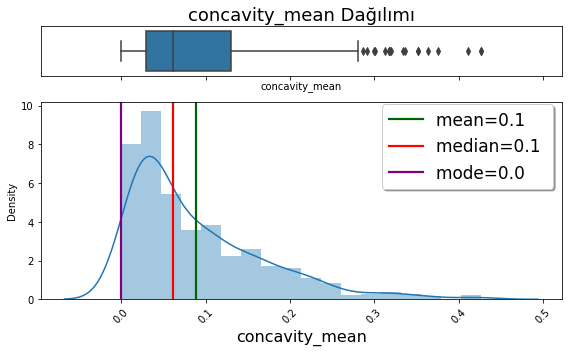

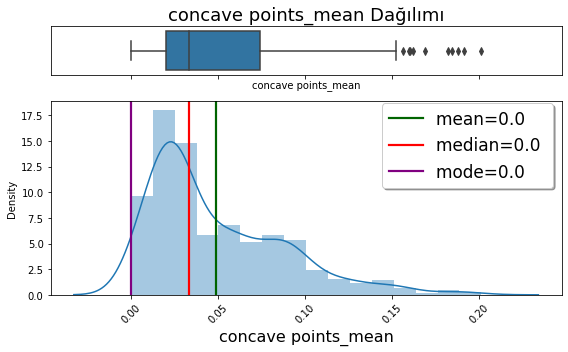

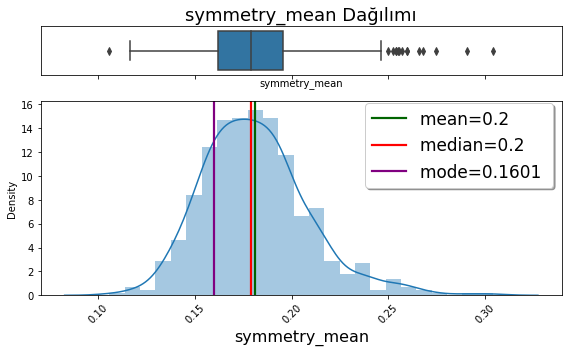

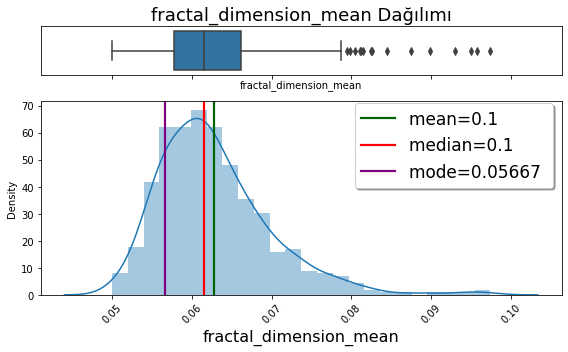

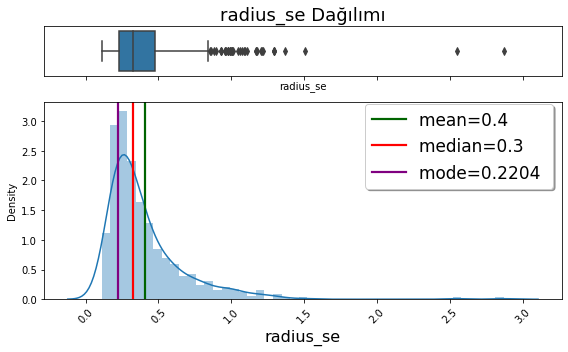

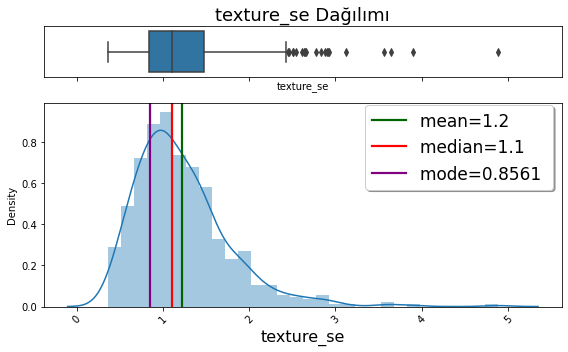

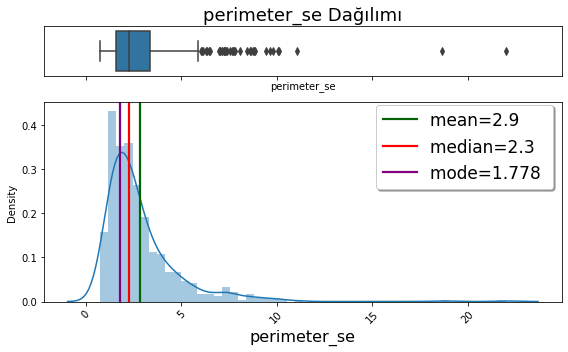

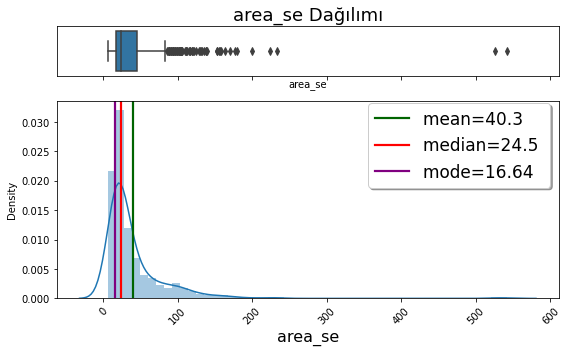

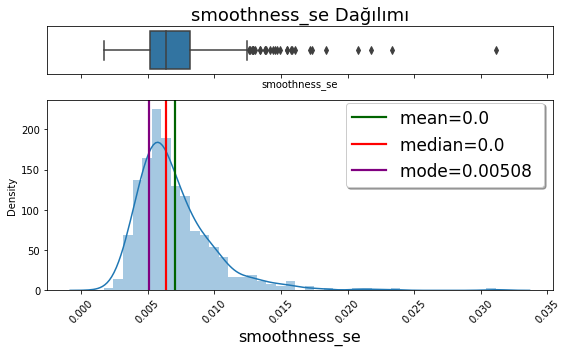

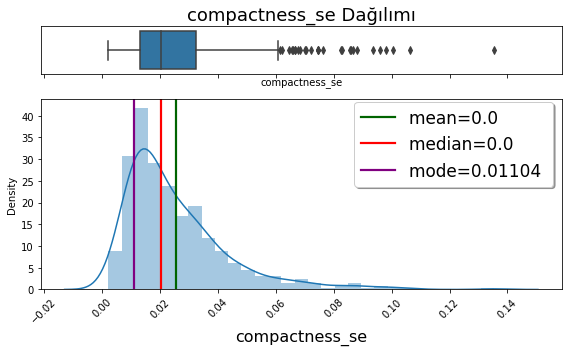

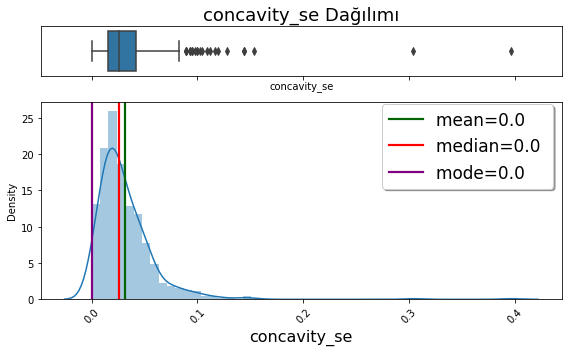

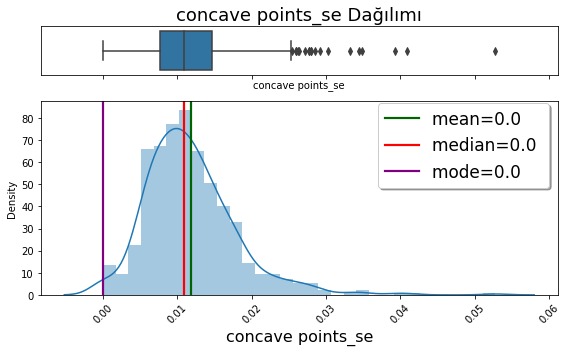

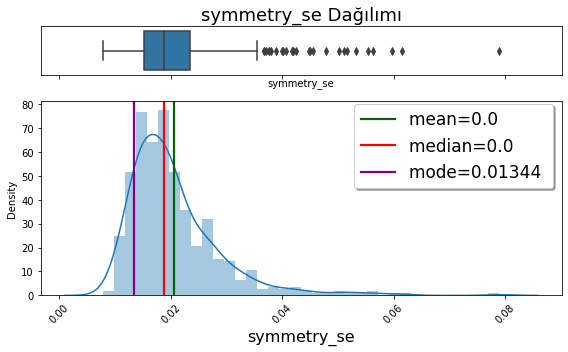

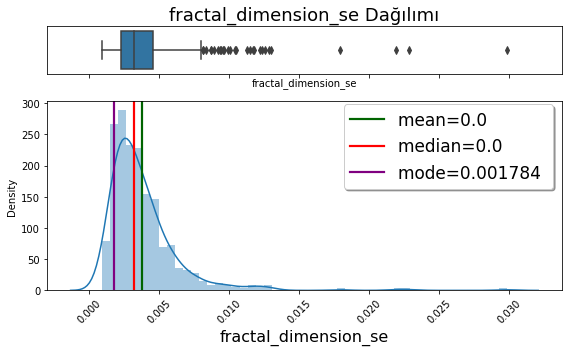

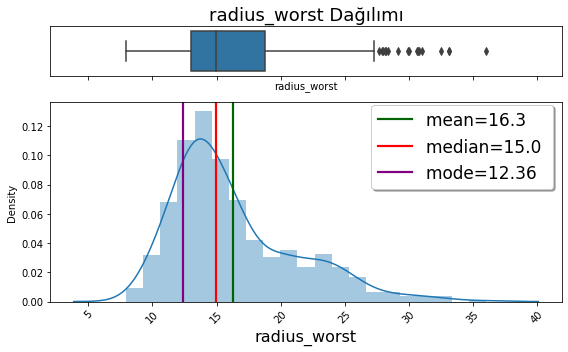

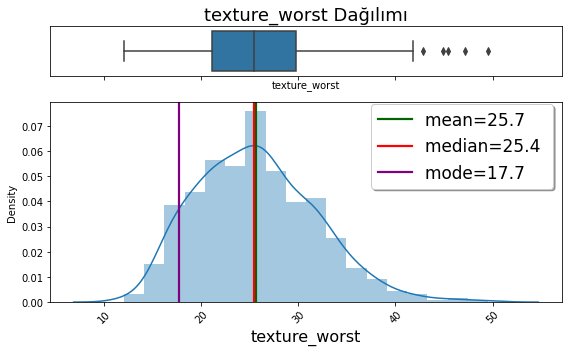

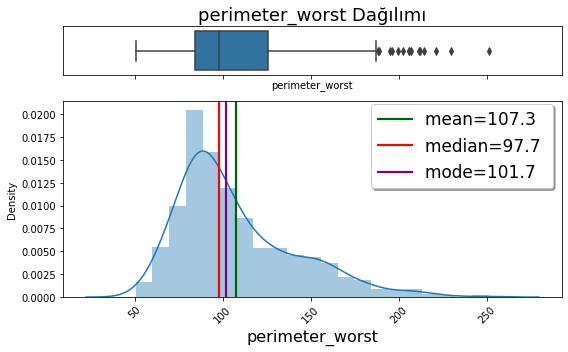

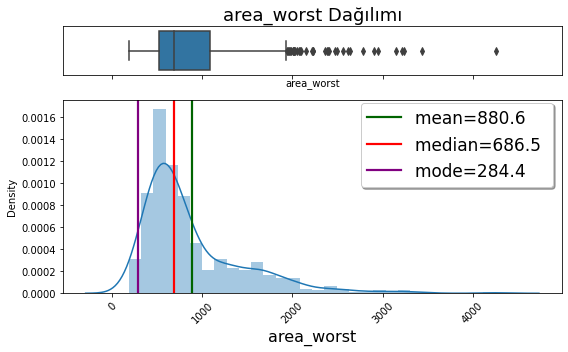

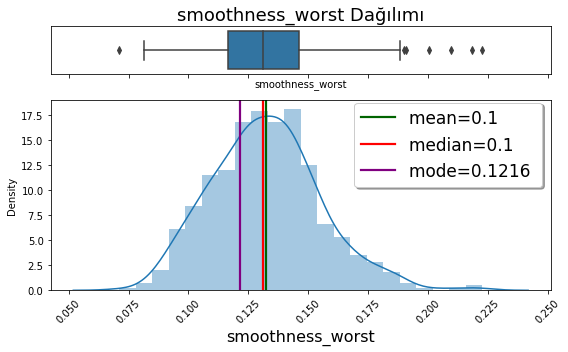

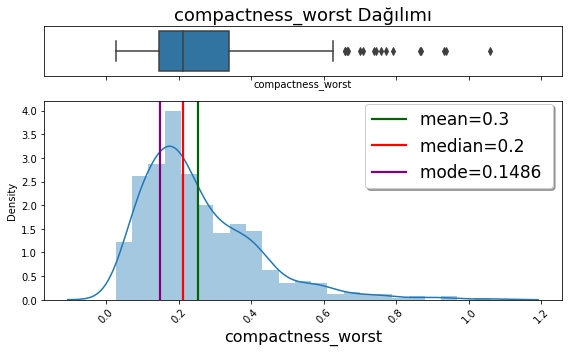

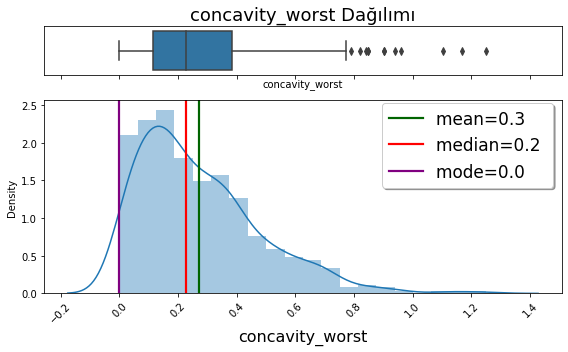

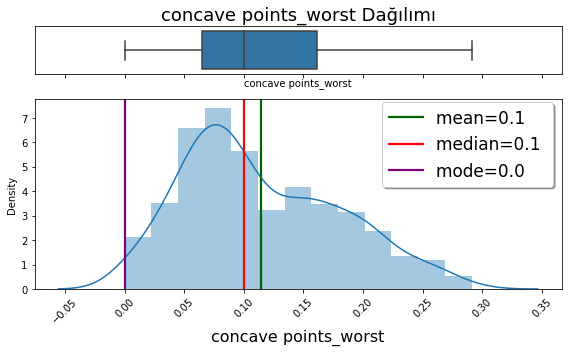

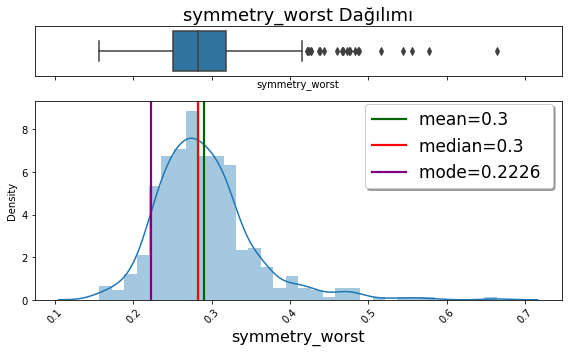

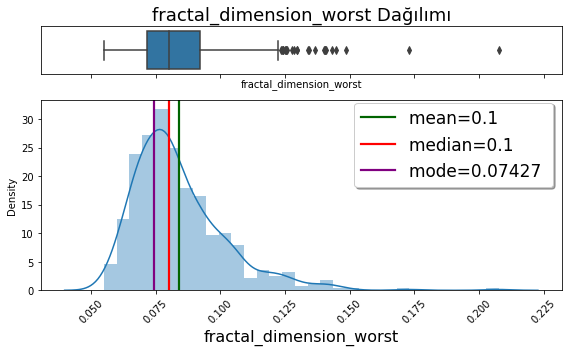

IndexError: ignored

In [ ]:
for i in range(1,len(df)):
  col=df.columns[i]
  numerical_plotting(df,col,f'{col} Dağılımı', ' ')


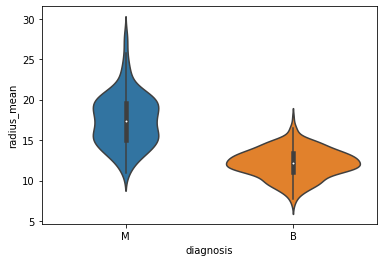

In [ ]:
#violinplot boxplot grafiğine benzer grafik her bir değişken için yapılabilir.
sns.violinplot(x=df["diagnosis"], y=df["radius_mean"])

**Correlation between variables**

In [ ]:
df.corr()

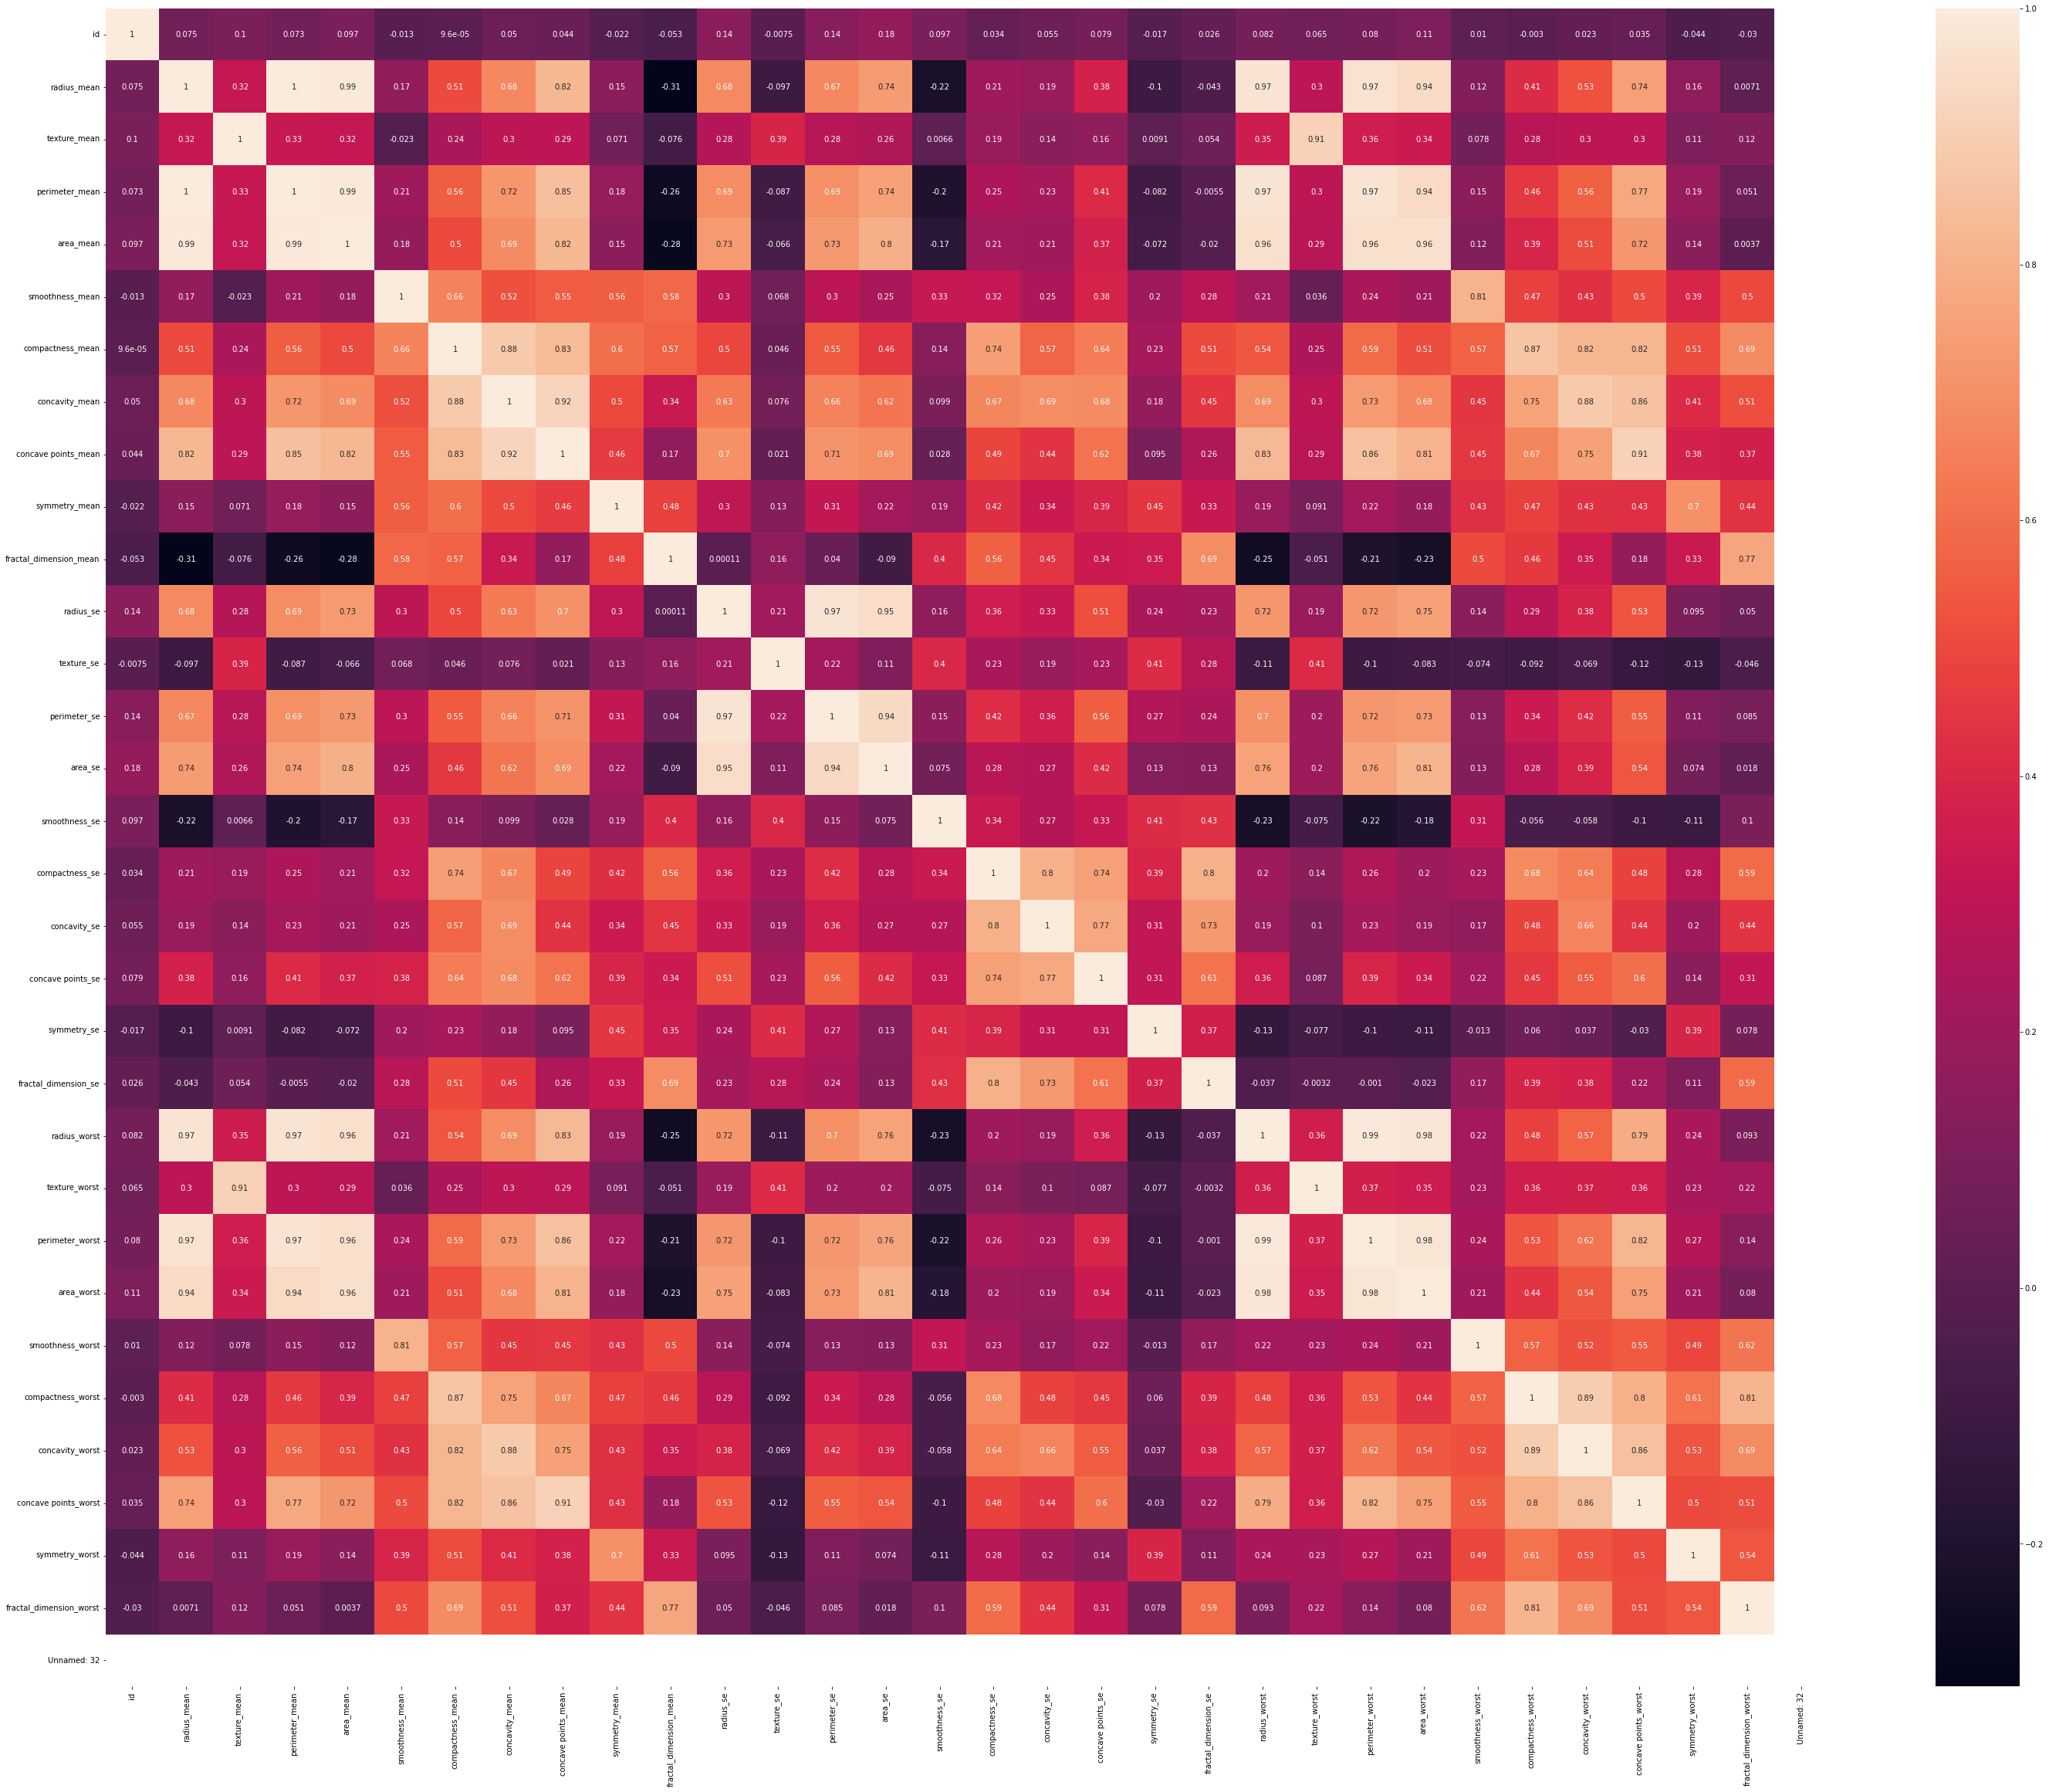

In [ ]:
plt.figure(figsize = [50, 40], facecolor = 'white')
sns.heatmap(df.corr(),annot=True)

'concave points_worst', 'perimeter_worst' and 'radius_worst' , 'diagnosis' ile güçlü bir ilişki vardır.

In [ ]:
# Hedef değişkeni M: 1 (kötü huylu) B=0 (iyi huylu)
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [ ]:
#Her bir değişkenin diagnosis ile ilişkisini incelemek istersek
cancerous = df.corr()['diagnosis'].sort_values(ascending=False).round(2)

In [ ]:
cancerous

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
area_worst                 0.73
radius_mean                0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothness_se             -0.07
Name: di

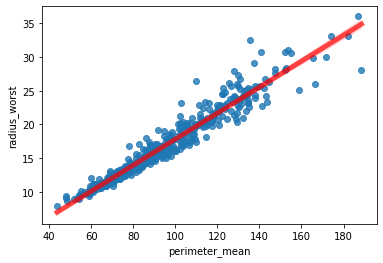

In [ ]:
sns.regplot(x=df["perimeter_mean"], y=df["radius_worst"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

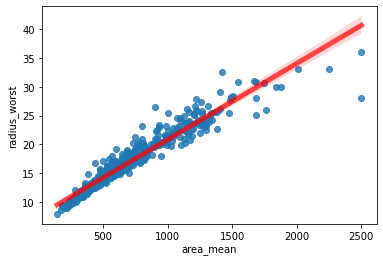

In [ ]:
sns.regplot(x=df["area_mean"], y=df["radius_worst"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

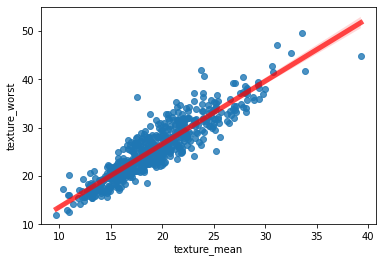

In [ ]:
sns.regplot(x=df["texture_mean"], y=df["texture_worst"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

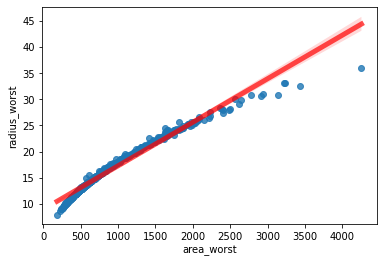

In [ ]:
sns.regplot(x=df["area_worst"], y=df["radius_worst"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

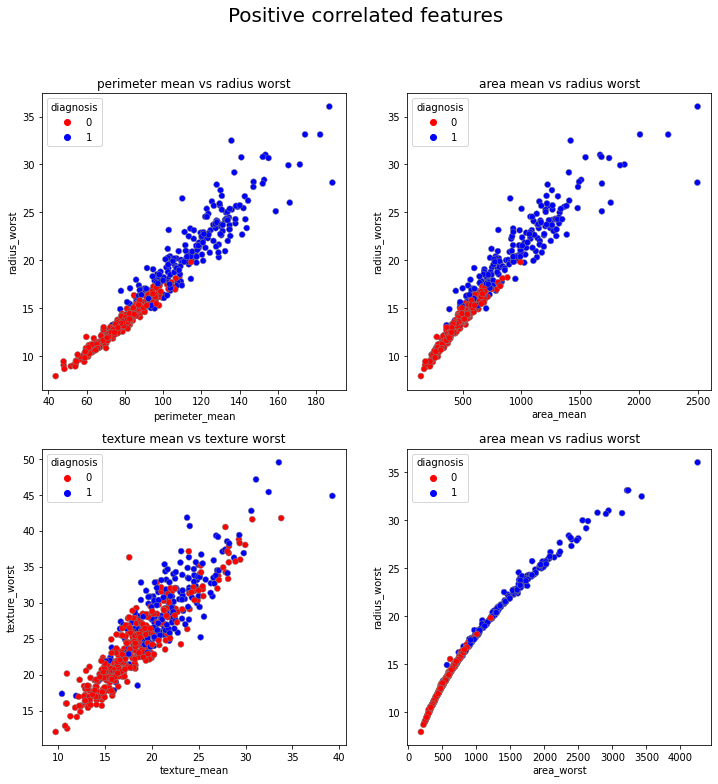

In [ ]:
#Pozitif ilişkili olan değişkenlerin bir arada gösterimi

palette ={0 : 'red', 1 : 'blue'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['perimeter_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['texture_mean'], y = df['texture_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['area_worst'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

İlişkisi olmayan değişkenler


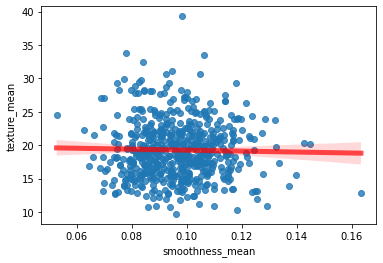

In [ ]:
sns.regplot(x=df["smoothness_mean"], y=df["texture_mean"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

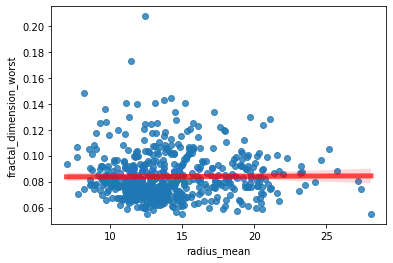

In [ ]:
sns.regplot(x=df["radius_mean"], y=df["fractal_dimension_worst"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

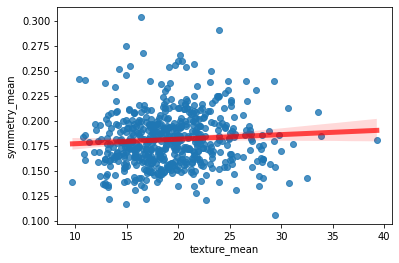

In [ ]:
sns.regplot(x=df["texture_mean"], y=df["symmetry_mean"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

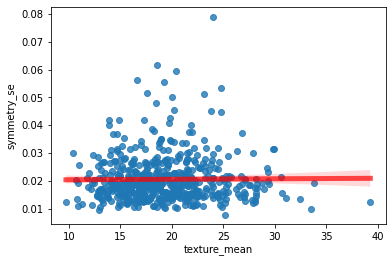

In [ ]:
sns.regplot(x=df["texture_mean"], y=df["symmetry_se"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

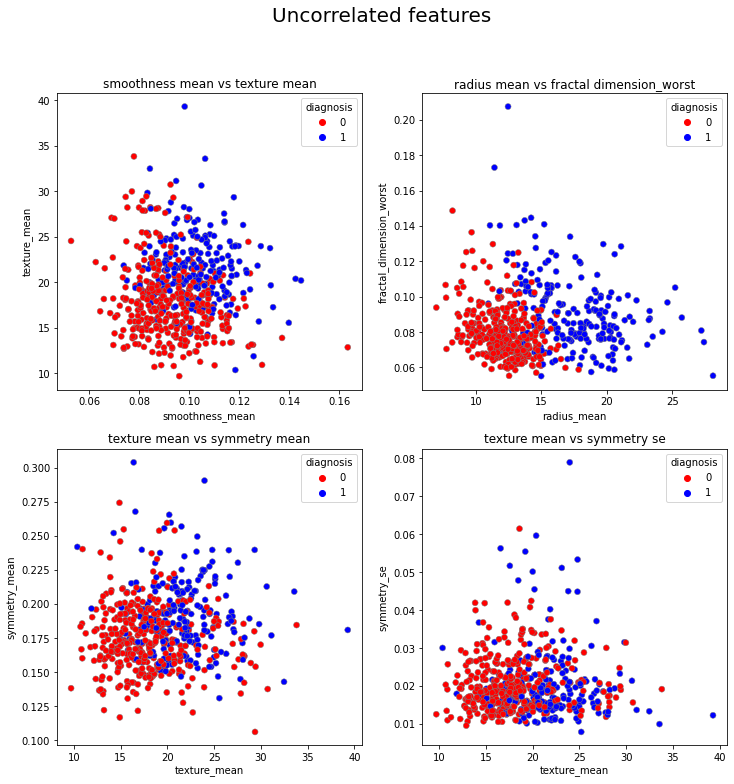

In [ ]:
#Değişkenler arasında ilişkili olmayanların birlikte görünümü
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['smoothness_mean'], y = df['texture_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['texture_mean'], y = df['symmetry_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['texture_mean'], y = df['symmetry_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

Negatif İlişkili Olan Değişkenler

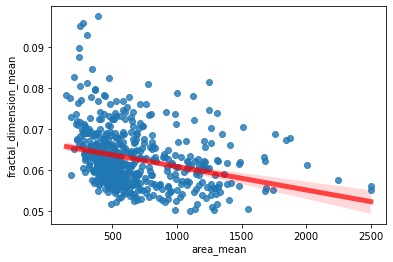

In [ ]:
sns.regplot(x=df["area_mean"], y=df["fractal_dimension_mean"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

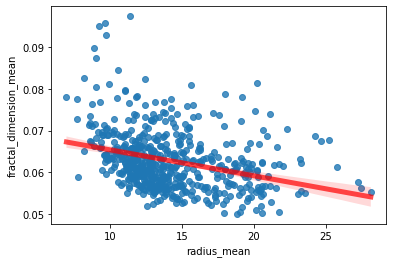

In [ ]:
sns.regplot(x=df["radius_mean"], y=df["fractal_dimension_mean"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

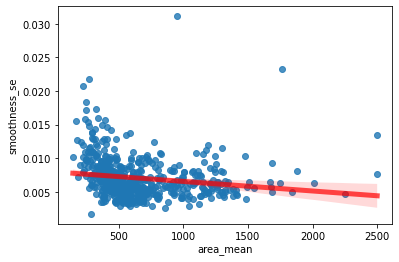

In [ ]:
sns.regplot(x=df["area_mean"], y=df["smoothness_se"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

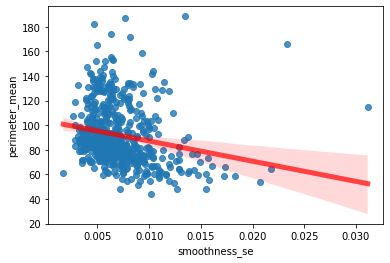

In [ ]:
sns.regplot(x=df["smoothness_se"], y=df["perimeter_mean"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

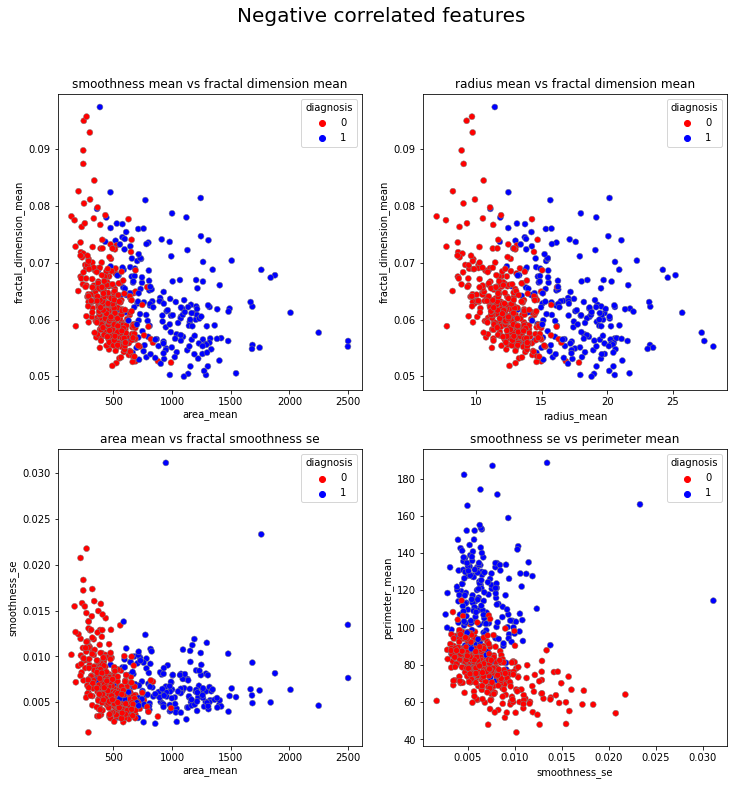

In [ ]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['area_mean'], y = df['fractal_dimension_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['smoothness_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = df['smoothness_se'], y = df['perimeter_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

-> are_worst,perimeter_worst,texture_worst,area_mean,perimeter_mean  değişkenlerin değerleri ne kadar yüksekse , meme kanseri olma riski yüksektir.Bu değişkenlere dikkat edilmeli


In [ ]:

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
x = df.drop(['diagnosis'], axis=True)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print('x_train Shape -',x_train.shape,',', 'y_train Shape -', y_train.shape)
print('x_test Shape -', x_test.shape,',','y_test shape -', y_test.shape)


x_train Shape - (455, 30) , y_train Shape - (455,)
x_test Shape - (114, 30) , y_test shape - (114,)


In [ ]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [ ]:
def find_outliers_IQR(x_train):
  q1= x_train.quantile(0.25)
  q3= x_train.quantile(0.75)
  IQR=q3-q1
  outliers=x_train[((x_train<q1-1.5*IQR))| (x_train>(q3+1.5*IQR))]
  return outliers

In [ ]:
for i in range(len(x_train)):
  outliers=find_outliers_IQR(x_train[x_train.columns[i]])
  print(f"Variable Name :{x_train.columns[i]} \n")
  print("number of outliers :" + str(len(outliers)))
  print("max outlier value: " + str(outliers.max()))
  print("min outlier value:"+ str(outliers.min()))
  print("\n")

Variable Name :radius_mean 

number of outliers :11
max outlier value: 28.11
min outlier value:22.27


Variable Name :texture_mean 

number of outliers :8
max outlier value: 39.28
min outlier value:29.81


Variable Name :perimeter_mean 

number of outliers :12
max outlier value: 188.5
min outlier value:147.3


Variable Name :area_mean 

number of outliers :27
max outlier value: 2501.0
min outlier value:1290.0


Variable Name :smoothness_mean 

number of outliers :5
max outlier value: 0.1634
min outlier value:0.05263


Variable Name :compactness_mean 

number of outliers :11
max outlier value: 0.3114
min outlier value:0.2363


Variable Name :concavity_mean 

number of outliers :15
max outlier value: 0.4268
min outlier value:0.2871


Variable Name :concave points_mean 

number of outliers :7
max outlier value: 0.2012
min outlier value:0.1595


Variable Name :symmetry_mean 

number of outliers :12
max outlier value: 0.304
min outlier value:0.2495


Variable Name :fractal_dimension_mean 



IndexError: ignored

Cap the outliers

In [ ]:
def cap_outliers(x_train):
  upper_limit = x_train.mean() + 3*x_train.std()

  print(f"Upper limit : {upper_limit}")

  lower_limit = x_train.mean() - 3*x_train.std()

  print(f"Lower_limit : {lower_limit}")
  x_train = np.where(x_train > upper_limit,
   upper_limit,
   np.where(

       x_train < lower_limit,

       lower_limit,

       x_train
   ))
  return print(f"Update the variable : {x_train} ")

In [ ]:
for i in range(len(x_train)):
  print(cap_outliers(x_train[x_train.columns[i]]))


Upper limit : 24.725080937774607
Lower_limit : 3.510189391895725
Update the variable : [ 9.029      21.09        9.173      10.65       10.17       14.54
 14.41       11.43       12.25       19.89       12.36       21.1
 14.87        9.667      13.4        19.27       17.99       15.22
 14.26       11.7        15.27       15.34       13.51       10.48
 14.64       14.45       11.04       19.81       10.26       12.89
 13.4        12.96       17.75       20.58       15.28       13.78
 15.1        12.34        8.196      13.45       11.32       22.27
 19.4         7.76       14.86       11.13        9.72        9.606
 10.08       12.56       15.13       10.48       12.78       14.74
  9.904      13.82       12.89       13.74       13.37       14.69
 12.91       13.62       17.35       15.         11.8        14.53
 13.71       11.36        8.726      16.11       18.49       13.71
 14.47       13.54       15.46       12.85       19.21       12.47
 12.46       10.86       11.37       18.81

IndexError: ignored

Değişkenleri birimleri birbirinden farklı olduğu ve kullanacağımız algoritmalar için scaler yani normalleştirme işlemi yapıyoruz.

In [ ]:
sc=StandardScaler()
x_train= sc.fit_transform(x_train)    
x_test= sc.transform(x_test)       

**Models**

In [ ]:
#Logistic Regression

In [ ]:
log_regression=LogisticRegression()
log_regression.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_proba = log_regression.predict_proba(x_test)[::,1]


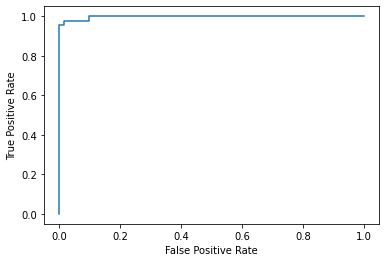

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

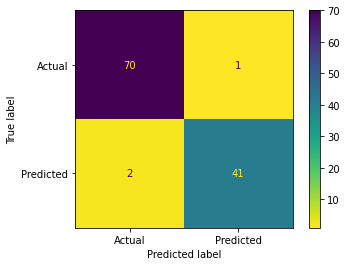

In [ ]:
disp = plot_confusion_matrix(log_regression, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

KNN CLASSİFİCATİON

In [ ]:
# k - en yakın komşu algoritmasını kullanmadan önce algoritmlarının parametrelerini fonksiyon haline dönüştürdük.
def knn_classifier_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7]), 
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),}
    #creat model anf pass parameters 
    knn_model= KNeighborsClassifier(**params)
    knn_model.fit(x_train,y_train)
    predection=knn_model.predict(x_test)
    acc = accuracy_score(y_test, predection)
    return acc



# Optuna-distributed
Optuna , özellikle makine öğrenimi için tasarlanmış otomatik bir hiperparametre optimizasyon yazılım çerçevesidir. Paralelleştirilmiş hiperparametre optimizasyonu, Optuna sorunları ve tartışmalarında oldukça sık görünen bir konudur. 
 

In [ ]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(knn_classifier_optuna, n_trials=200)

[I 2023-01-04 05:07:30,705] A new study created in memory with name: no-name-5728f33b-94b2-4a5e-844b-d66cdfabe33f
[I 2023-01-04 05:07:30,906] Trial 0 finished with value: 0.9298245614035088 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 150, 'p': 9}. Best is trial 0 with value: 0.9298245614035088.
[I 2023-01-04 05:07:31,109] Trial 1 finished with value: 0.9298245614035088 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 94, 'p': 24}. Best is trial 0 with value: 0.9298245614035088.
[I 2023-01-04 05:07:31,334] Trial 2 finished with value: 0.9298245614035088 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 105, 'p': 11}. Best is trial 0 with value: 0.9298245614035088.
[I 2023-01-04 05:07:31,538] Trial 3 finished with value: 0.9385964912280702 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 102, 'p': 15}. Best is tr

In [ ]:
print("Biten trial(deneme)sayısı : ", len(study.trials))
print("En iyi trial:")
trial = study.best_trial

print(" Değer: {}".format(trial.value))
print("  Parametre: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Biten trial(deneme)sayısı :  200
En iyi trial:
 Değer: 0.8947368421052632
  Parametre: 
    n_neighbors: 1
    weights: distance
    algorithm: ball_tree
    leaf_size: 85
    p: 32


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='brute',leaf_size=109,p=28)
knn_best.fit(x_train,y_train)
y_pred_knn = knn_best.predict(x_test)
y_pred_train_knn   = knn_best.predict(x_train)

In [ ]:
print("Test verisini KNN kullanarak Percition(Kesinlik) : {:.2f} %".format(np.round(precision_score(y_test, y_pred_knn),4)*100))
print("Test verisini KNN kullanarak Recall(: {:.2f} %".format(np.round(recall_score(y_test, y_pred_knn),4)*100))
print("Test verisini KNN kullanarak Accuracy(Doğruluk): {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_knn),4)*100))

Test verisini KNN kullanarak Percition(Kesinlik) : 88.37 %
Test verisini KNN kullanarak Recall(: 88.37 %
Test verisini KNN kullanarak Accuracy(Doğruluk): 91.23 %


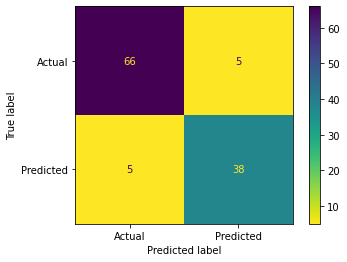

In [ ]:
disp = plot_confusion_matrix(knn_best, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

In [ ]:
confusion_matrix(y_test,y_pred_knn)

array([[66,  5],
       [ 5, 38]])

In [ ]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [ ]:
fpr, tpr ,t =roc_curve(y_test,y_pred_knn)
plot_roc()

NameError: ignored

In [ ]:
knn_df = pd.DataFrame({"predicted":y_pred_knn,"actual":y_test})
knn_df.head()

,predicted,actual
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0


**Random forest Classifier**

In [ ]:
def randomforest_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    params = {

        'criterion'        : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'bootstrap'        : trial.suggest_categorical('bootstrap',['True','False']),
        'max_depth'        : trial.suggest_int('max_depth', 1, 30000),
        'max_features'     : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
        'max_leaf_nodes'   : trial.suggest_int('max_leaf_nodes', 1, 30000),
        'n_estimators'     : trial.suggest_int('n_estimators', 30, 1000),


    }
    #creat model anf pass parameters 
    model = RandomForestClassifier(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    acc = accuracy_score(y_test, predection)
    return acc

In [ ]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(randomforest_optuna, n_trials=200)

[I 2022-12-28 14:28:39,796] A new study created in memory with name: no-name-281393f5-7339-4fc9-9bab-3699d3a0fe25
[I 2022-12-28 14:28:40,320] Trial 0 finished with value: 0.9649122807017544 and parameters: {'criterion': 'entropy', 'bootstrap': 'False', 'max_depth': 20123, 'max_features': 'log2', 'max_leaf_nodes': 22116, 'n_estimators': 278}. Best is trial 0 with value: 0.9649122807017544.
[I 2022-12-28 14:28:41,868] Trial 1 finished with value: 0.9649122807017544 and parameters: {'criterion': 'entropy', 'bootstrap': 'False', 'max_depth': 2664, 'max_features': 'log2', 'max_leaf_nodes': 14940, 'n_estimators': 852}. Best is trial 0 with value: 0.9649122807017544.
[I 2022-12-28 14:28:42,930] Trial 2 finished with value: 0.9649122807017544 and parameters: {'criterion': 'gini', 'bootstrap': 'True', 'max_depth': 23540, 'max_features': 'log2', 'max_leaf_nodes': 6396, 'n_estimators': 679}. Best is trial 0 with value: 0.9649122807017544.
[I 2022-12-28 14:28:43,334] Trial 3 finished with value: 0

In [ ]:
print("Biten trial(deneme)sayısı : ", len(study.trials))
print("En iyi trial(deneme):")
trial = study.best_trial

print(" Değer: {}".format(trial.value))
print(" Parametre: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("   {}: {}".format(key, value))

Biten trial(deneme)sayısı :  200
En iyi trial(deneme):
 Değer: 0.956140350877193
 Parametre: 
   criterion: gini
   bootstrap: False
   max_depth: 22241
   max_features: sqrt
   max_leaf_nodes: 17856
   n_estimators: 89


In [ ]:
rf_best = RandomForestClassifier(bootstrap= True,max_depth=8604,criterion='gini',max_features='log2',max_leaf_nodes= 16399,n_estimators= 147)
rf_best.fit(x_train,y_train)
y_pred_rf = rf_best.predict(x_test)
y_pred_train_rf   = rf_best.predict(x_train)

In [ ]:
print("Percition   using RF  on test  Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_rf),4)*100))
print("Recall      using RF  on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_rf),4)*100))
print("Accurcy     using RF  on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_rf),4)*100))

Percition   using RF  on test  Data  : 97.56 %
Recall      using RF  on test Data   : 93.02 %
Accurcy     using RF  on test Data   : 96.49 %


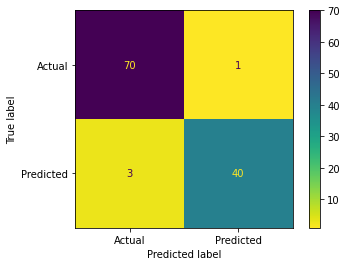

In [ ]:
disp = plot_confusion_matrix(rf_best, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

In [ ]:
rf_best.feature_importances_

array([0.03191421, 0.01765292, 0.04410985, 0.07624192, 0.00725443,
       0.01248434, 0.02933939, 0.08824239, 0.00496315, 0.00476888,
       0.01932707, 0.00491167, 0.01186495, 0.04105398, 0.003885  ,
       0.00615098, 0.00574115, 0.00650174, 0.00532522, 0.00571007,
       0.10640388, 0.0208339 , 0.14901125, 0.09923175, 0.0115016 ,
       0.02815444, 0.04358119, 0.08854919, 0.01706324, 0.00822626])

In [ ]:
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

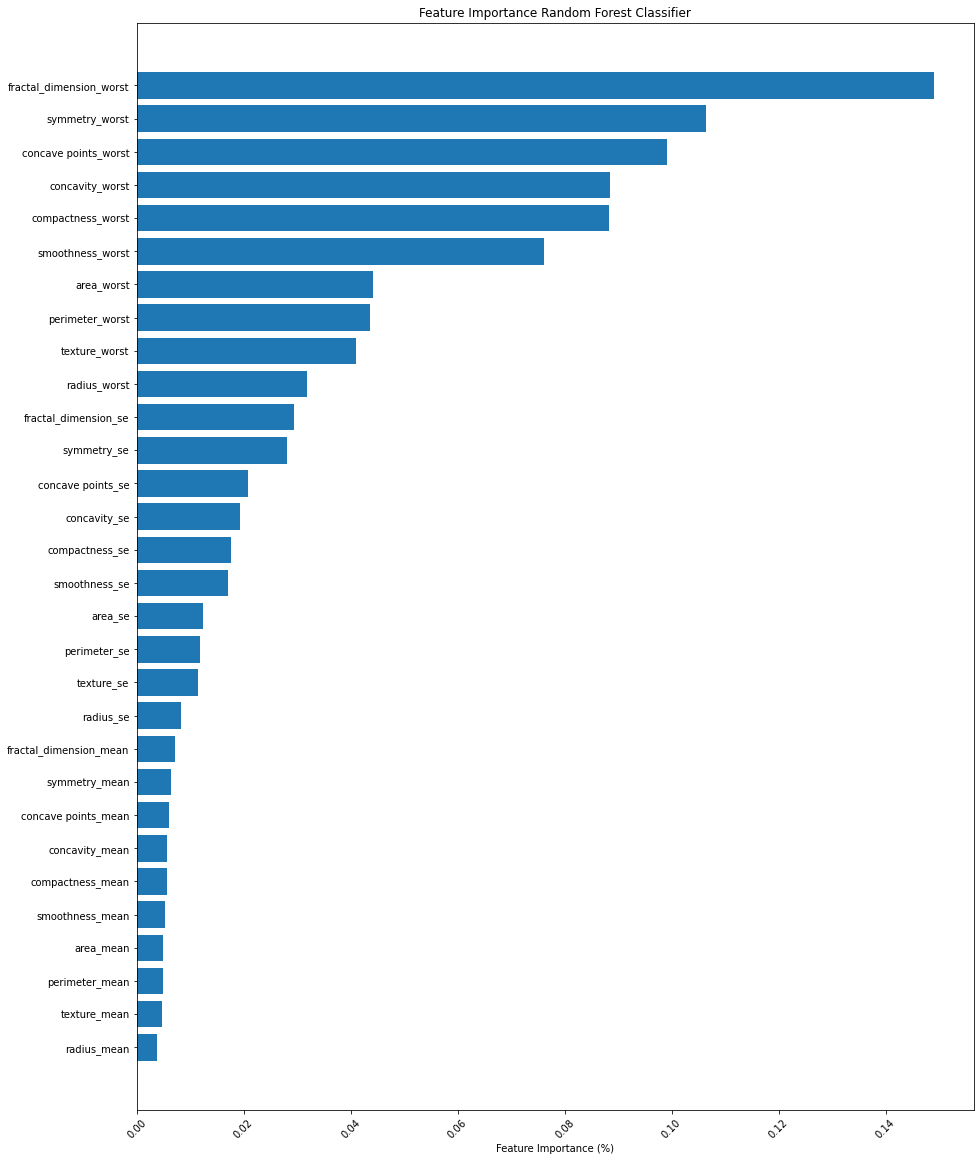

In [ ]:
plot_feature_importance_2(x,rf_best,' Random Forest Classifier')

**Principal Component Analysis (PCA)**

In [ ]:
df=pd.read_csv("data.csv")
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
# Change object to integer:
df["diagnosis"] = [1 if item == "M" else 0  for item in df["diagnosis"]]
y = df["diagnosis"]
x = df.drop(["diagnosis"],axis=1)

In [ ]:
# PCA yapmadan önce değişkenleri normalizasyon yapmalıyız.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#PCA oluşturma kısmı
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

In [ ]:
pca_data = pd.DataFrame(X_reduced_pca,columns=["p1","p2"])
pca_data["diagnosis"] = y

**Yeni Dataframe Oluşturma**

In [ ]:
pca_data.head()

,p1,p2,p3,p4,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,1
1,2.387802,-3.768172,-0.529293,1.118264,1
2,5.733896,-1.075174,-0.551748,0.912083,1
3,7.122953,10.275589,-3.232790,0.152547,1
4,3.935302,-1.948072,1.389767,2.940639,1


In [ ]:
y_pca = pca_data.diagnosis
x_pca = pca_data.drop(["diagnosis"],axis=1)

In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.33, random_state=42)

**PCA ile KNN Model**

In [ ]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)

In [ ]:
knn_cm_pca = confusion_matrix(y_test_pca,y_pred_pca)
knn_acc_pca = metrics.accuracy_score(y_test_pca, y_pred_pca)
print(knn_cm_pca)
print(knn_acc_pca)

[[113   8]
 [  1  66]]
0.9521276595744681


Hangi Noktalar Doğru Alanda

In [ ]:
from matplotlib.colors import ListedColormap

(-8.775852804248377, 13.52414719575194)

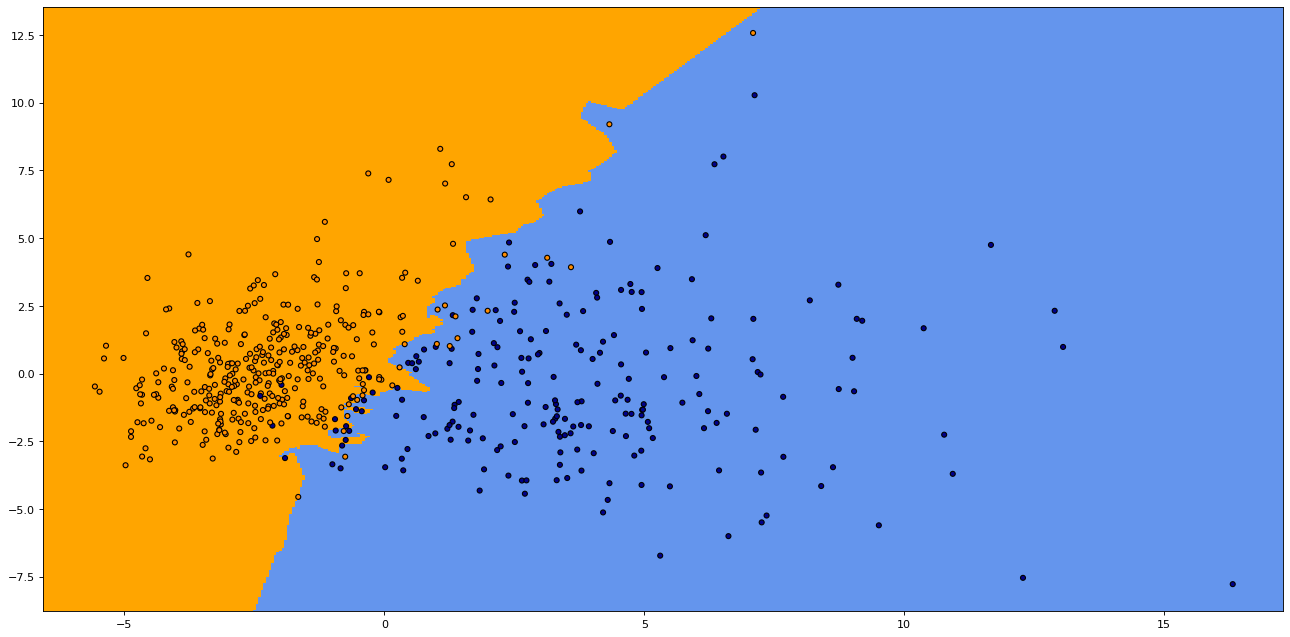

In [ ]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_pca
x_min, x_max = (X.iloc[:, 0].min() - 1), (X.iloc[:, 0].max() + 1)
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())